#Feature Matching

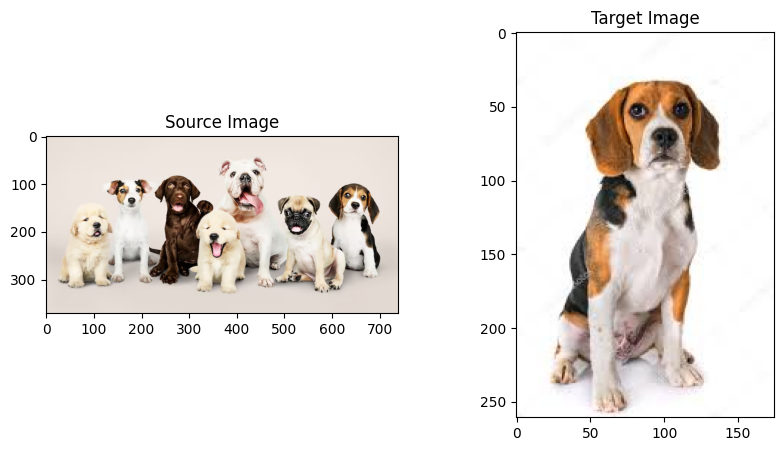

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/DR_AI_응용/강의_7기_AI응용_4차시_추적 알고리즘 실습/Dog_breed.png'
target_path = '/content/drive/MyDrive/DR_AI_응용/강의_7기_AI응용_4차시_추적 알고리즘 실습/beagle.png'

image = cv2.imread(image_path)
target = cv2.imread(target_path)

image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
target_rgb = cv2.cvtColor(target,cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(image_rgb)
axes[0].set_title('Source Image')
axes[1].imshow(target_rgb)
axes[1].set_title("Target Image")
plt.show()





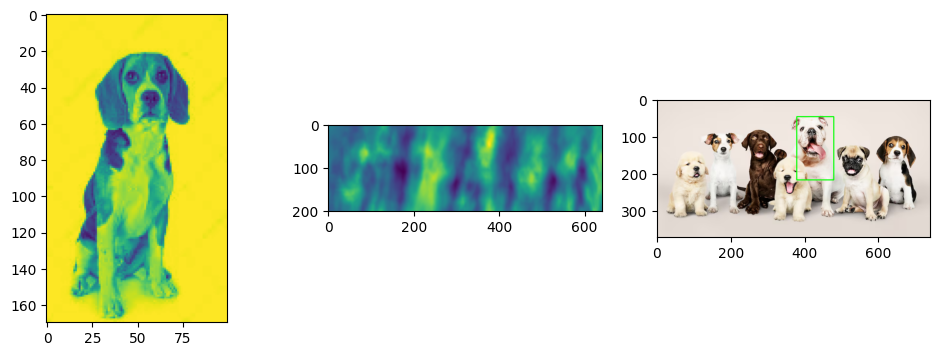

In [36]:
#conver color to gray -> adjust target scale -> matching ->visualization

src_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
target_gray = cv2.resize(target_gray,(100,170))

w, h = target_gray.shape[::-1]

sim = cv2.matchTemplate(src_gray,target_gray,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(sim)

top_left = max_loc
bottom_right = (top_left[0]+w,top_left[1]+h)

matched = image.copy()
matched = cv2.cvtColor(matched,cv2.COLOR_BGR2RGB)
cv2.rectangle(matched,top_left,bottom_right,(0,255,0),2)

fig,axes = plt.subplots(1,3,figsize=(12,4))
axes[0].imshow(target_gray)
axes[1].imshow(sim)
axes[2].imshow(matched)
plt.show()


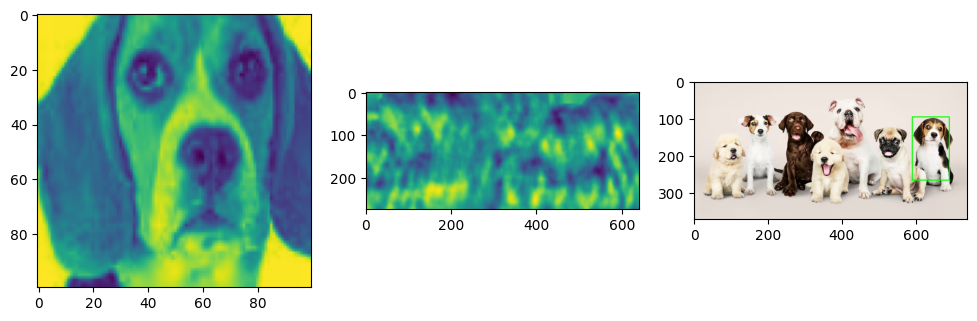

In [16]:
# crop target image remaning only face
src_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
target_gray = target_gray[40:100,50:130]
target_gray = cv2.resize(target_gray,(100,100))

w = 100
h = 170

sim = cv2.matchTemplate(src_gray,target_gray,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(sim)

top_left = max_loc
bottom_right = (top_left[0]+w,top_left[1]+h)

matched = image.copy()
matched = cv2.cvtColor(matched,cv2.COLOR_BGR2RGB)
cv2.rectangle(matched,top_left,bottom_right,(0,255,0),2)

fig,axes = plt.subplots(1,3,figsize=(12,4))
axes[0].imshow(target_gray)
axes[1].imshow(sim)
axes[2].imshow(matched)
plt.show()

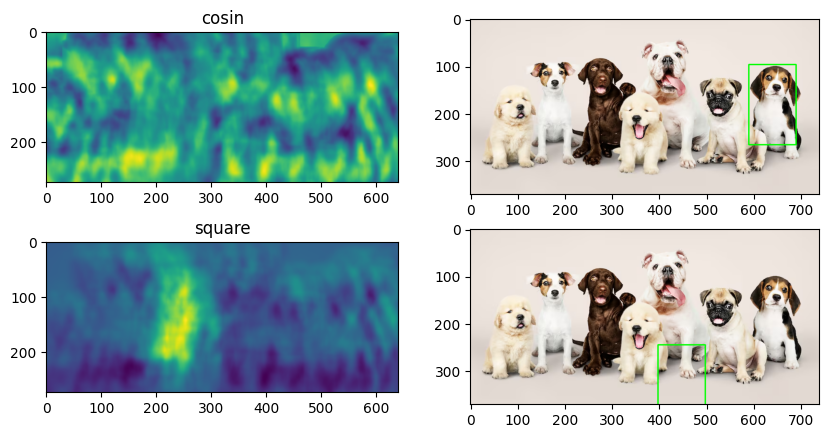

In [34]:
src_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
target_gray = target_gray[40:100,50:130]
target_gray = cv2.resize(target_gray,(100,100))

w = 100
h = 170

option = [cv2.TM_CCOEFF_NORMED,cv2.TM_SQDIFF_NORMED]
title = [ "cosin","square"]
fig,axes = plt.subplots(2,2,figsize=(10,5))
for i,(opt,t) in enumerate(zip(option,title)) :
  sim = cv2.matchTemplate(src_gray,target_gray,opt)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(sim)

  top_left = min_loc if opt == cv2.TM_SQDIFF_NORMED else max_loc
  bottom_right = (top_left[0]+w,top_left[1]+h)

  matched = image.copy()
  matched = cv2.cvtColor(matched,cv2.COLOR_BGR2RGB)
  cv2.rectangle(matched,top_left,bottom_right,(0,255,0),2)
  axes[i,0].set_title(t)
  axes[i,0].imshow(sim, cmap='viridis')
  axes[i,1].imshow(matched)

plt.show()